## Problem 3: How many people live near shopping centers? (8 points)

In the last step of this analysis, use a *spatial join* to relate data from a population grid data set to the buffer layer created in *problem 2* to find out how many people live in all population grid cells that are **within** 1.5 km distance from each shopping centre. 

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS).


*Feel free to divide your solution into more codeblocks than prepared! Remember to add comments to your code :)*

### a) Load the population grid data set and the buffer geometries (2 points)

Use the same population grid data set as during [lesson 3](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/spatial-join.html) (load it directly from WFS, don’t forget to assign a CRS). Load the data into a `GeoDataFrame` called `population_grid`.

(optional) If you want, discard unneeded columns and translate the remaining column names from Finnish to English.

In [1]:
# ADD YOUR OWN CODE HERE
import geopandas
import pandas
import matplotlib.pyplot as plt

population_grid = geopandas.read_file(
    (
        "https://kartta.hsy.fi/geoserver/wfs"
        "?service=wfs"
        "&version=2.0.0"
        "&request=GetFeature"
        "&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020"
        "&srsName=EPSG:3879"
    ),
)

population_grid.crs = "EPSG:3879"
population_grid = population_grid[["asukkaita", "geometry"]]
population_grid = population_grid.rename(columns={"asukkaita": "population"})

population_grid.head()

,population,geometry
0,5,"POLYGON ((25472499.995 6685998.998, 25472499.9..."
1,8,"POLYGON ((25472499.995 6684249.004, 25472499.9..."
2,5,"POLYGON ((25472499.995 6683999.005, 25472499.9..."
3,13,"POLYGON ((25472499.995 6682998.998, 25472499.9..."
4,5,"POLYGON ((25472749.993 6690249.003, 25472749.9..."


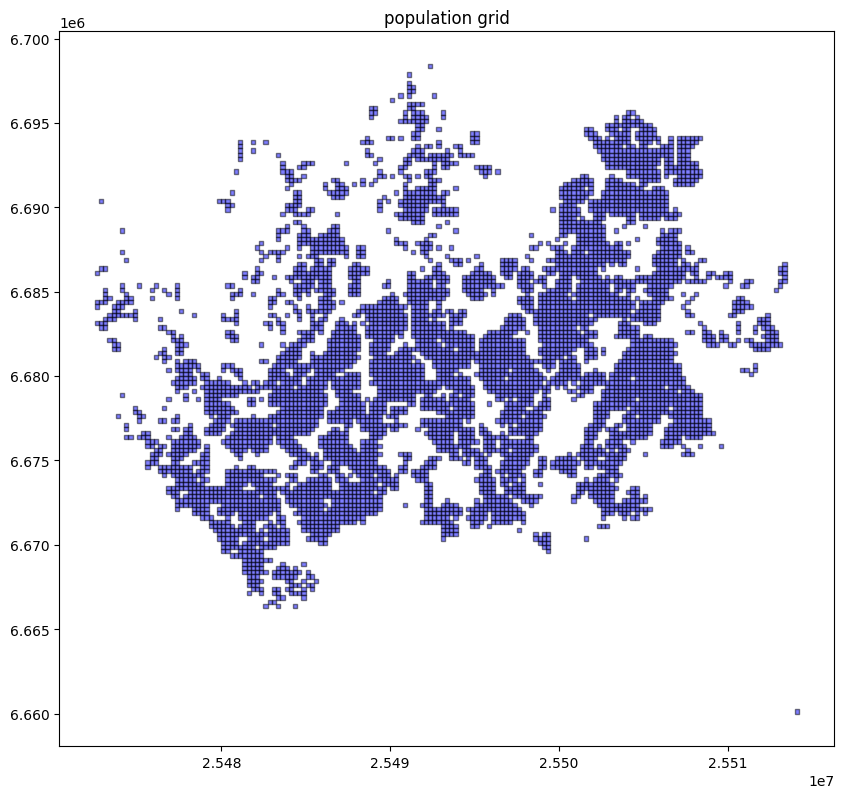

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
population_grid.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)
ax.set_title("population grid")
plt.show()

In [3]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
import pyproj

assert isinstance(population_grid, geopandas.GeoDataFrame)
assert population_grid.crs == pyproj.CRS("EPSG:3879")



Load the buffers computed in *problem 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Add an `assert` statement to check whether the two data frames are in the same CRS.

In [4]:
# ADD YOUR OWN CODE HERE
import pathlib

NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"
geopackage_path = DATA_DIRECTORY / "shopping_centres.gpkg"

shopping_centre_buffers = geopandas.read_file(geopackage_path, layer='buffers')

shopping_centre_buffers.head()

,address,id,name,addr,geometry
0,"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,"Fazer Café, 20, Mannerheimintie, Keskusta, Klu...",2,Forum,"Mannerheimintie 20, 00100 Helsinki, Finland","POLYGON ((25498045.722 6672923.353, 25498038.4..."
2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25487054.265 6671954.969, 25487047.0..."
3,"Life, 3-9, Leppävaarankatu, Ruusutorppa, Etelä...",4,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491151.383 6678394.318, 25491144.1..."
4,"Jumbo, 3, Vantaanportinkatu, Vantaanportti, Pa...",5,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499601.692 6686561.206, 25499594.4..."


In [5]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert isinstance(shopping_centre_buffers, geopandas.GeoDataFrame)
assert shopping_centre_buffers.geometry.geom_type.unique() == ["Polygon"]
assert shopping_centre_buffers.crs == pyproj.CRS("EPSG:3879")


---

### b) Carry out a *spatial join* between the `population_grid` and the `shopping_centre_buffers`  (2 points)

Join the shopping centre’s `id` column (and others, if you want) to the population grid data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 


In [6]:
# ADD YOUR OWN CODE HERE
joined_data = geopandas.sjoin(population_grid, shopping_centre_buffers, how='inner', predicate='within')
joined_data.head()

,population,geometry,index_right,address,id,name,addr
1148,81,"POLYGON ((25484250.000 6672249.006, 25484250.0...",2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
1149,20,"POLYGON ((25484250.000 6671748.997, 25484250.0...",2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
1211,110,"POLYGON ((25484499.998 6672749.004, 25484499.9...",2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
1212,136,"POLYGON ((25484499.998 6672499.005, 25484499.9...",2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
1213,89,"POLYGON ((25484499.998 6672249.006, 25484499.9...",2,"11, Piispansilta, Matinkylä, Suur-Matinkylä, E...",3,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"


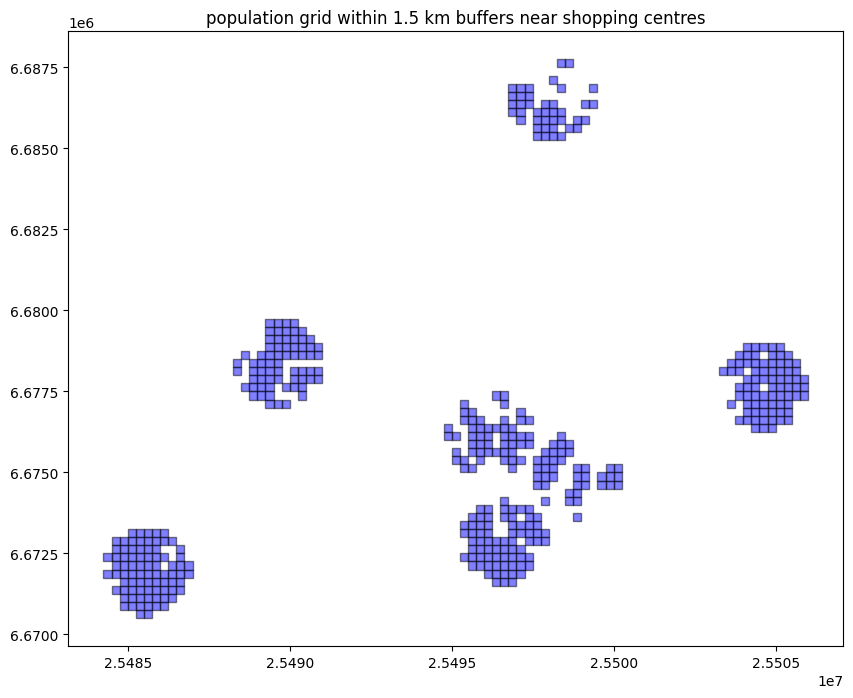

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
joined_data.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)
ax.set_title("population grid within 1.5 km buffers near shopping centres")
plt.show()


---

### c) Compute the population sum around shopping centres (2 points)

Group the resulting (joint) data frame by shopping centre (`id` or `name`), and calculate the `sum()` of the population living inside the 1.5 km radius around them.

Print the results, for instance, in the form "12345 people live within 1.5 km from REDI".

In [8]:
# ADD YOUR OWN CODE HERE
population_sum = joined_data.groupby('name')['population'].sum()
population_sum

name
Forum        55568
Iso-omena    26268
Itis         20889
Jumbo        10956
REDI         26978
Sello        25059
Tripla       24336
Name: population, dtype: int64

In [9]:
for name, population in population_sum.items():
    print(f"{population} people live within 1.5 km from {name}.")

55568 people live within 1.5 km from Forum.
26268 people live within 1.5 km from Iso-omena.
20889 people live within 1.5 km from Itis.
10956 people live within 1.5 km from Jumbo.
26978 people live within 1.5 km from REDI.
25059 people live within 1.5 km from Sello.
24336 people live within 1.5 km from Tripla.



---

### d) Reflection

Good job! You are almost done with this week’s exercise. Please quickly answer the following short questions:
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

Add your answers in a new *Markdown* cell below: